In [5]:
using LinearAlgebra
using Pkg
using Arpack
using Random
using Distributions
using DataStructures
using Combinatorics
using PyPlot
using BenchmarkTools
using SparseArrays
using Permutations

In [6]:
T = 2 
B = 0
beta = 1/T

0.5

In [7]:
function E(spin_state,  J)
    e = 0
    #J = 2
    for i in 1:(length(spin_state))-1
        s_i = spin_state[i]
        j = (i+1)
        s_j = spin_state[j]
        e= e - J*(s_i*s_j)
    end
    return e
end

function spin_lattice(number_of_particle::Int64)
    spin_states = []
    for i in 1:number_of_particle
        randn = rand(1)[1]
        if randn >= 0.5
            push!(spin_states, 1.0)
        else
            push!(spin_states, -1.0)
        end
    end
    return spin_states
end

spin_lattice (generic function with 1 method)

In [55]:

function spin_change(spin_states, J, T)
    β = 1/T
    
    E_i = E(spin_states, J)
    k = rand(1:length(spin_states))
    spin_states[k] *= -1
    E_f = E(spin_states, J)
    dE = E_f  - E_i 
    
    r = rand(1)[1]
    if  r >= exp(-β*dE)
        spin_states[k] *= -1
    end
    return E(spin_states, J), spin_states
        
end


function domain1(spin_state)
    A = 0
    
    for i in 1:length(spin_state)-1
        if spin_state[i]*spin_state[i+1] == 1.0
            A += 1
        end
    end
    return A
end
            
        
    


function domain(spin_state)
    a = 1
    d = []
    for i in 1:length(spin_state)-1

        k = spin_state[i]*spin_state[i+1]
        if k == 1.0
            a = a + 1
        else
            if a != 0 | 1
                push!(d,a)
            end
            a = 1
        end            
            
    end
    return mean(d)
end


        
        

spin_state = spin_lattice(N)
mean(domain(spin_state))

3.0078125

-0.7443487064116986    1.0346356259328313    2033.6209767164    

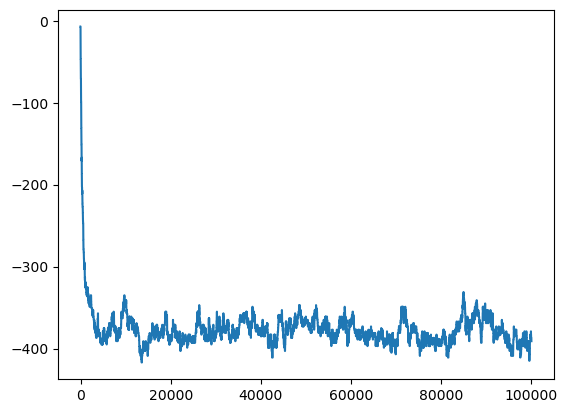

9.174940529981502

In [49]:
N = 500
spin_state = spin_lattice(N)
T = 1
J = 1
EE = []
MM = []
A = []
for i in LinRange(0,1,100000)
    e, s = spin_change(spin_state, 1,T)
    m = sum(spin_state)/N
    M = m*N
    d = domain(spin_state)
    push!(EE, e)
    push!(MM, M)
    push!(A, d)

end

meanE = mean(EE[2000:10000])/N
C = (mean(EE.^2) - mean(EE).^2)/T
χ = (mean(MM.^2) - mean(MM).^2)/T
#meanA = mean(A)

PyPlot.plot(EE)

print(meanE)
print("    ")
print(C/N)
print("    ")
print(χ)
print("    ")
mean(A)



-0.8358482689663792    4.703271377382334    0.0    Any[]

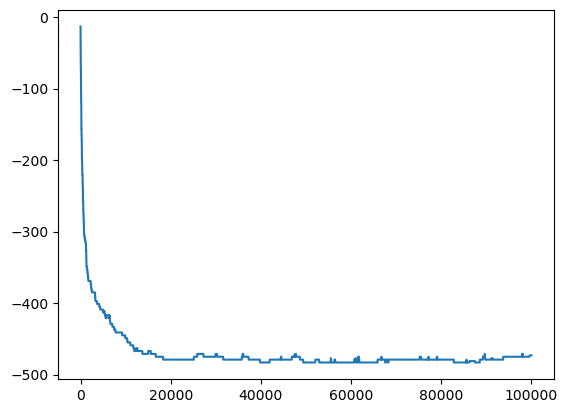

In [24]:
N = 500
spin_state = spin_lattice(N)
T = 0.5
J = 1

m = sum(spin_state)/N
M = m*N

mm = []
EE = []
MM = []
A = []
for i in LinRange(0,1,100000)
    e, s = spin_change(spin_state, 1,T)
    m = sum(spin_state)/N
    M = m*N
    d = domain(spin_state)
    push!(EE, e)
    push!(mm,m)
    push!(MM, M)
    push!(A, d)

end


PyPlot.plot(EE)

meanE = mean(EE[2000:10000])/N
C = (mean(EE.^2) - mean(EE).^2)/T
χ = (mean(M.^2) - mean(M).^2)/T
meanA = mean(A)


print(meanE)
print("    ")
print(C/N)
print("    ")
print(χ)
print("    ")
print(meanA/N)



-0.8652543432070992    0.124813658879998    0.0    0.883708

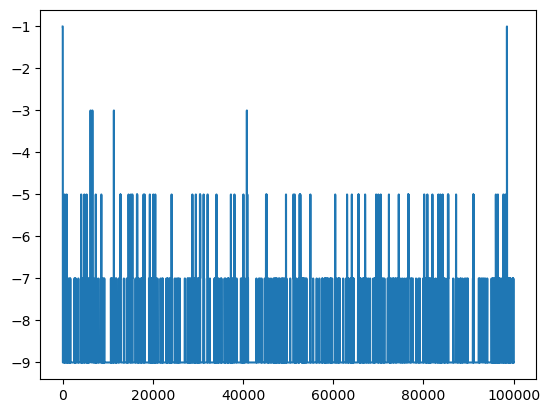

In [21]:
N = 10
spin_state = spin_lattice(N)
T = 0.5
J = 1

m = sum(spin_state)/N
M = m*N

mm = []
EE = []
MM = []
A = []
for i in LinRange(0,1,100000)
    e, s = spin_change(spin_state, 1,T)
    m = sum(spin_state)/N
    M = m*N
    d = domain(spin_state)
    push!(EE, e)
    push!(mm,m)
    push!(MM, M)
    push!(A, d)

end


PyPlot.plot(EE)

meanE = mean(EE[2000:10000])/N
C = (mean(EE.^2) - mean(EE).^2)/T
χ = (mean(M.^2) - mean(M).^2)/T
meanA = mean(A)


print(meanE)
print("    ")
print(C/N)
print("    ")
print(χ)
print("    ")
print(meanA/N)



In [18]:
N = 100
spin_state = spin_lattice(N)

m = sum(spin_state)/N
M = m*N


EE = []
for i in LinRange(0,1,10000)
    e, s = spin_change(spin_state, 0.3)
    push!(EE, e)

end
push!(EE, mean(EE))


PyPlot.plot(EE)

mean(EE[2000:10000])/500

LoadError: MethodError: no method matching spin_change(::Vector{Any}, ::Float64)
[0mClosest candidates are:
[0m  spin_change(::Any, ::Any, [91m::Any[39m) at In[8]:2

In [7]:
function energy_ising_1d(configuration,J,h)
    num_spins = length(configuration)
    energy = 0.0
    for i in 1:num_spins
        spini = configuration[i]
        #set the value of spin i+1, make sure to test if i+1<num_spins, and otherwise account for periodic boundaries
        #you can do this with an if statement if you have to
        ip1 = (i+1)%num_spins
        if ip1 == 0
            ip1 += 1
        end
        spinip1 = configuration[ip1]
        
        energy = energy - J * (spini * spinip1) - h*spini
    end      
    return energy
end
        
#Check that the energy is correct
test_num_spins = 10
#this should be true for any J, h
test_J = 1
test_h = 2

test_configuration_1 = -1.0*ones(test_num_spins)
test_configuration_2 = +1.0*ones(test_num_spins)

#this sets even entries to -1
test_configuration_3 = spin_lattice(test_num_spins)


print("Test Config:", test_configuration_3)

print("Energy Config:", energy_ising_1d(test_configuration_3,test_J,test_h))
print("");
print("Expected Energy Config:",test_num_spins*test_J)

Test Config:Any[-1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0]Energy Config:-8.0Expected Energy Config:10

High temperature:

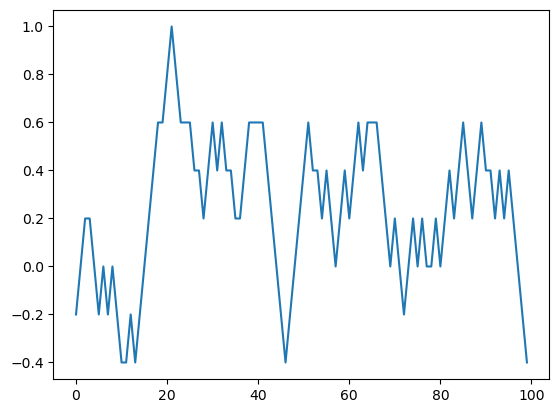

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x000000006E88B8E0>

In [8]:
function metropolis_mc_slow(n_steps, n_lattice_sites, beta, J, h)
    configuration = spin_lattice(n_lattice_sites)
    average_spins = []
    energy = []
    
    current_energy = energy_ising_1d(configuration,J,h)
    
    for i in 1:n_steps
        spin_to_change = rand(1:n_lattice_sites)
        
        configuration[spin_to_change] *= -1
        energy_flip = energy_ising_1d(configuration,J,h)
        r = rand(1)[1]
        #do metropolis test w/ this random nubmer r 
        if r<minimum([1,exp.(-beta*(energy_flip-current_energy))] )
            current_energy = energy_flip
        else
            #set spin back the same way you did before
            configuration[spin_to_change] *= -1
        end
        
        #this computes the average of the spin observable
        average_spin = mean(configuration)
        push!(average_spins,average_spin )
        push!(energy, current_energy)

        
    end
    
    return average_spins
end
    
            
#do a test high temperature simulation
print("High temperature:")
average_spins = metropolis_mc_slow(100, 10, 0.1, 1, 2)


PyPlot.plot(average_spins)
##do a test on a low temperature simulation
#print("Low temperature:")
#average_spins = metropolis_mc_slow(100, 10, 1, 1, 2)

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


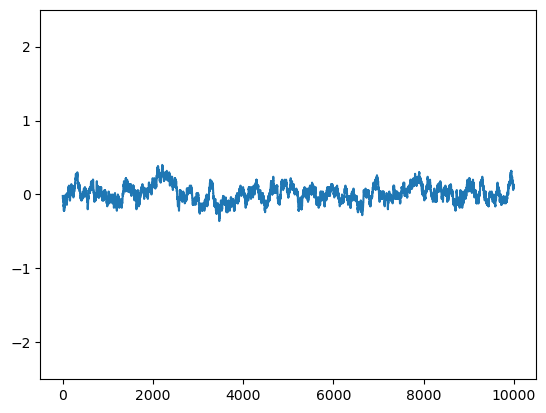

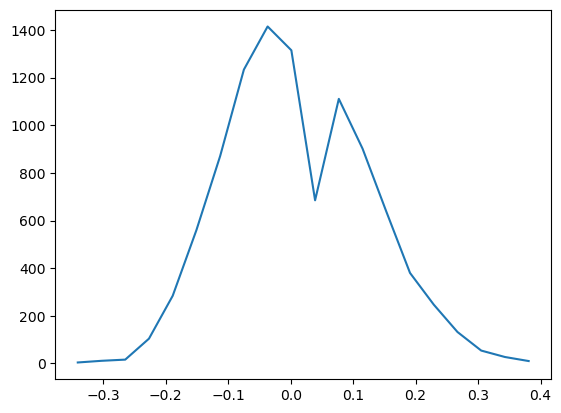

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x000000007076D190>

In [9]:
function bin_average(bins)
    return (bins[2:length(bins)].+bins[1:length(bins)-1])./2.
end

test_n_lattice_sites = 100
test_beta = 0.2
test_J = 1
test_h = 0

# we usually do number of mc moves proportional to number of lattice sites. 
#this is one reason we had to have fast mc code above
test_n_steps = test_n_lattice_sites*100

# First, let's one run simulation, and see how the values of spin converge
average_spins = metropolis_mc_slow(test_n_steps, test_n_lattice_sites, test_beta, test_J,test_h)
PyPlot.plot(average_spins)
PyPlot.ylim(-2.5,2.5)
PyPlot.show()

# it doesn't seem to take long for the average spin value to converage under these conditions, 
# but let's compute quantities from the second half of the simulation

#let's look at the histogram of spins from this simulation
spin_hist, spin_bins = PyPlot.hist(average_spins , bins = 20)
PyPlot.figure()
PyPlot.plot(bin_average(spin_bins),spin_hist)



#for h in np.arange(-2,2,0.1):
#    average_spins = metropolis_mc_fast(test_n_steps, test_n_lattice_sites, test_beta, test_J,h)
#    final_average_spin = average

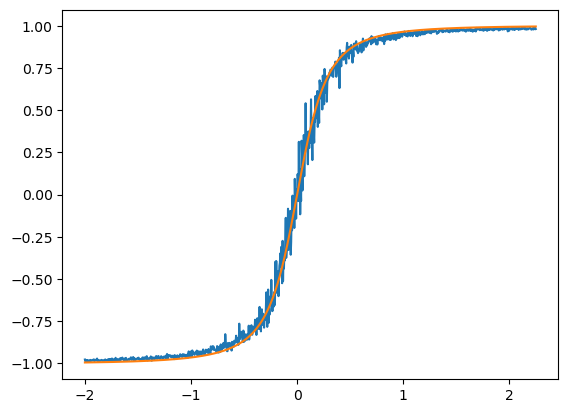

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000000EE8970>

In [10]:
function ising_spin_exact(beta,J,h)
    sbh = sinh.(beta.*h)
    cbh = cosh.(beta.*h)
    efactor = exp.(-4*beta*J)
    numerator = sbh .+ sbh .* cbh./sqrt.(sbh .* sbh .+ efactor)
    denominator = cbh + sqrt.(sbh .* sbh.+efactor)
    return numerator ./ denominator
end

test_n_lattice_sites = 50
test_beta = 0.75
test_J = 1

test_n_steps = test_n_lattice_sites*100

test_h_list = LinRange(-2.0, 2.25,1000)
spin_vs_h = []
for test_h in test_h_list
    average_spin_at_h = metropolis_mc_slow(test_n_steps, test_n_lattice_sites, test_beta, test_J,test_h)
    mean_spin_from_trajectory = mean(average_spin_at_h)
    push!(spin_vs_h,mean_spin_from_trajectory )
end
predicted_spin_v_h = ising_spin_exact(test_beta,test_J,test_h_list)

plot(test_h_list,spin_vs_h)
plot(test_h_list,predicted_spin_v_h)


In [11]:
spin_vs_h

1000-element Vector{Any}:
 -0.9768959999999995
 -0.9873439999999996
 -0.9805519999999996
 -0.9820079999999998
 -0.981311999999999
 -0.9860879999999997
 -0.9806720000000004
 -0.9832159999999993
 -0.9844559999999989
 -0.9829839999999999
 -0.9882
 -0.9865599999999997
 -0.979368
  ⋮
  0.9852239999999994
  0.9781199999999988
  0.9808559999999997
  0.9795599999999997
  0.9828560000000003
  0.9876719999999998
  0.9786399999999994
  0.9809519999999997
  0.9860159999999994
  0.9872639999999999
  0.9868719999999994
  0.9813039999999997

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


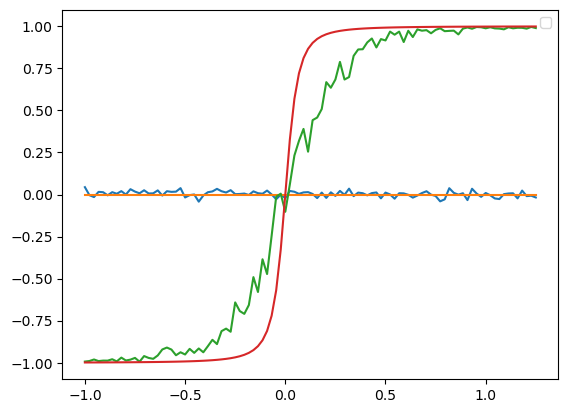

PyObject <matplotlib.legend.Legend object at 0x0000000002097FD0>

In [17]:
test_n_lattice_sites = 500
test_n_steps = test_n_lattice_sites*10
test_J = 1

#scanning beta for a range of h's

test_h_list = LinRange(-1,1.25,100)
test_beta_list = LinRange(0,1.25,2)

for test_beta in test_beta_list
    spin_vs_h = []
    for test_h in test_h_list
        average_spin_at_h = metropolis_mc_slow(test_n_steps, test_n_lattice_sites, test_beta, test_J,test_h)
        
        k = length(average_spin_at_h)÷2

        mean_spin_from_trajectory = mean(average_spin_at_h[k:length(average_spin_at_h)])
        push!(spin_vs_h, mean_spin_from_trajectory)
    end

    predicted_spin_v_h = ising_spin_exact(test_beta,test_J,test_h_list)

    p = PyPlot.plot(test_h_list,spin_vs_h)
    PyPlot.plot(test_h_list,predicted_spin_v_h)
end

PyPlot.legend(loc=0)

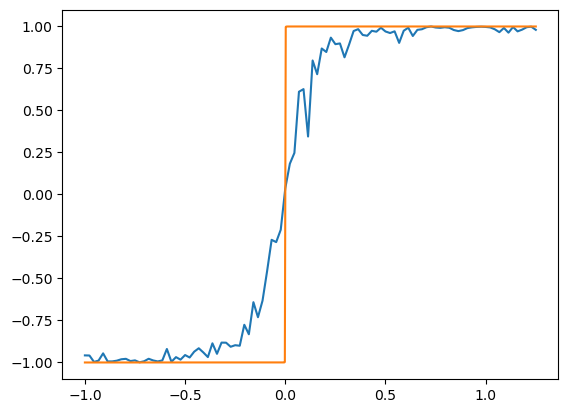

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000025C3B50>

In [26]:
test_n_lattice_sites = 500
test_n_steps = test_n_lattice_sites*10
test_J = 2

#scanning beta for a range of h's

test_h_list = LinRange(-1,1.25,100)
test_beta_list = [2]

for test_beta in test_beta_list
    spin_vs_h = []
    for test_h in test_h_list
        average_spin_at_h = metropolis_mc_slow(test_n_steps, test_n_lattice_sites, test_beta, test_J,test_h)
        
        k = length(average_spin_at_h)÷2

        mean_spin_from_trajectory = mean(average_spin_at_h[k:length(average_spin_at_h)])
        push!(spin_vs_h, mean_spin_from_trajectory)
    end
    p = PyPlot.plot(test_h_list,spin_vs_h)
   
end
h_list = LinRange(-1,1.25,1000)
predicted_spin_v_h = ising_spin_exact(test_beta_list[1] ,test_J,h_list)
PyPlot.plot(h_list,predicted_spin_v_h)

In [18]:
mean(spin_vs_h)

0.10148638144742066

In [15]:
5÷2

2

In [ ]:
N = 500
T = 2
